In [77]:
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
import numpy as np
import time

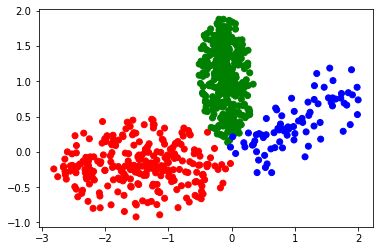

In [105]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def visualisationSolution(data):
    X, Y, Color = [], [], []

    for point in data[0]:
        #print(point)
        X.append(point[0])
        Y.append(point[1])
        #print(type((str(point[2]))))
        if(str(point[2]) == "b'0'"):
            Color.append("r")
        elif(str(point[2]) == "b'1'"):
            Color.append("g")
        else:
            Color.append("b")

    plt.scatter(X, Y, c=Color)
    plt.show()

def visualisation(data, color):
    X, Y, Color = [], [], []

    for i in range(len(data[0])):
        #print(point)
        X.append(data[0][i][0])
        Y.append(data[0][i][1])
        
        if(color[i] == 0):
            Color.append("r")
        elif(color[i] == 1):
            Color.append("g")
        elif(color[i] == 2):
            Color.append("b")
        elif(color[i] == 3):
            Color.append("c")
        elif(color[i] == 4):
            Color.append("m")
        elif(color[i] == 5):
            Color.append("y")
        else:
            Color.append("k")

    plt.scatter(X, Y, c=Color)
    plt.show()

visualisationSolution(data)

# Debut

In [38]:
def convertirData(data):
    X = []
    for point in data[0]:
        #print(point)
        X.append([point[0],point[1]])
    array = np.array(X)
    return (array)

#convertirData(data)

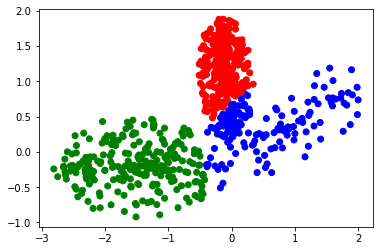

In [106]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(convertirData(data))
visualisation(data, kmeans.labels_)

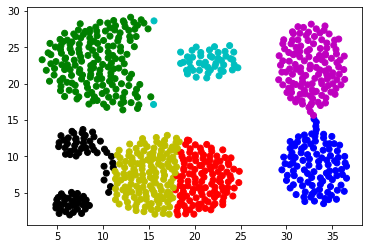

In [126]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/aggregation.arff','r'))
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)

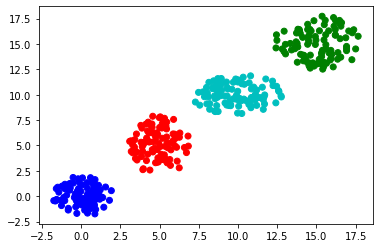

In [116]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/spherical_4_3.arff','r'))
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


# Score

In [90]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [148]:

def trouverKSilhouette(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDavies(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCal(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverK(data):
    s = trouverKSilhouette(data)
    d = trouverKDavies(data)
    c = trouverKCal(data)
    
    return c
    
    
    
    
    

Début de Silhouette
2 : 0.5752880726565915
--- 0.9371018409729004 seconds ---


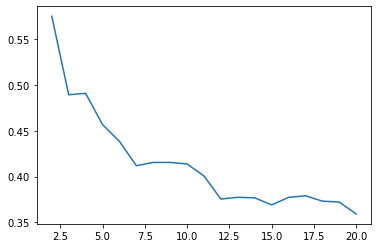

Début de Davies
20 : 0.870670945324966
--- 0.9190521240234375 seconds ---


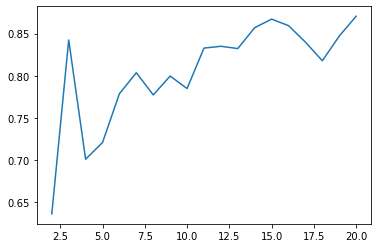

Début de Calinski
10 : 1394.0086086088945
--- 0.8344874382019043 seconds ---


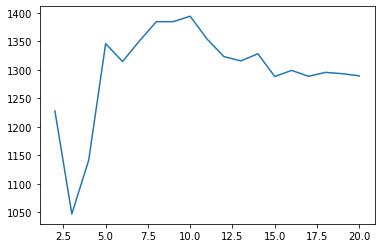

10

In [149]:
trouverK(data)

In [131]:
def tempsSilhouette(data, rmax = 100):
    print("Début de Silhouette en temps")
    
    listeN = []
    listeTemps = []
    
    for r in range(3, rmax):
        start_time = time.time()

        nMeilleur = 0
        scoreMeilleur = 0
        scoreActuel = 0

        for n in range(2, r+1):
            kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
            scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

            if(scoreActuel > scoreMeilleur):
                scoreMeilleur = scoreActuel
                nMeilleur = n

        listeN.append(r)
        listeTemps.append(time.time() - start_time)

        
    plt.plot(listeN, listeTemps)
    plt.show()

Début de Silhouette en temps


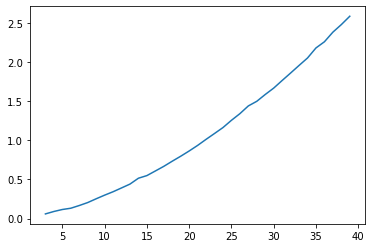

In [135]:
tempsSilhouette(data, 40)

# Limite

Début de Silhouette
3 : 0.361456276818138
--- 0.16959047317504883 seconds ---
Début de Davies
2 : 1.1684561185868998
--- 0.2036128044128418 seconds ---
Début de Calinski
6 : 257.68840064149117
--- 0.15422868728637695 seconds ---


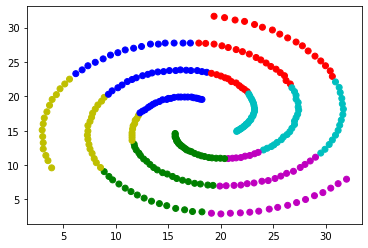

In [94]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


Début de Silhouette
3 : 0.36888924507684434
--- 1.6262753009796143 seconds ---
Début de Davies
2 : 1.233917410210905
--- 0.5585763454437256 seconds ---
Début de Calinski
7 : 3835.308047098052
--- 0.5287730693817139 seconds ---


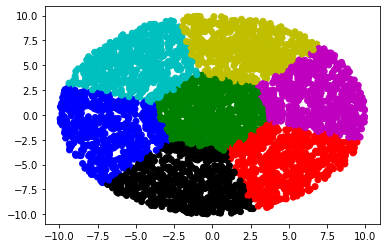

In [95]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/disk-4500n.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


#### Une autre métrique aurait aidé à trouver les bons résultats précédement. Mais ici, c'est ma méthode k-means elle même qui pose problème

# Clustering agglomératif

In [87]:
from sklearn.cluster import AgglomerativeClustering

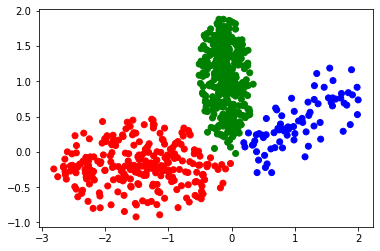

In [150]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

clustering = AgglomerativeClustering(n_clusters=3).fit(convertirData(data))

visualisation(data, clustering.labels_)




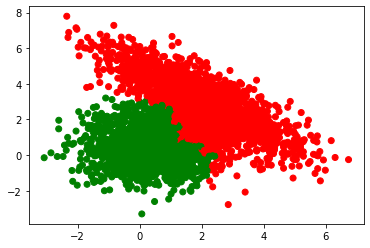

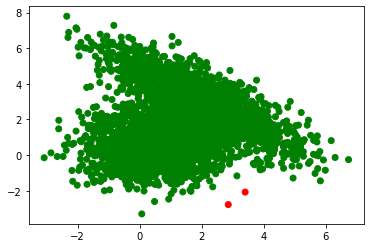

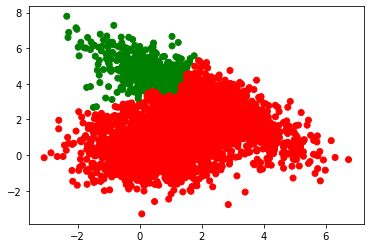

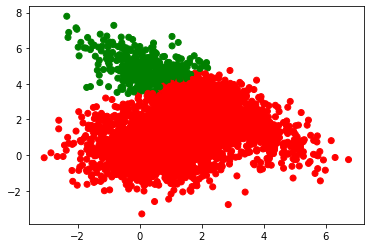

In [103]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/engytime.arff','r'))

clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='average').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(convertirData(data))
visualisation(data, clustering.labels_)

# Metrique

In [157]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def trouverKSilhouetteAgglo(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDaviesAgglo(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCalAgglo(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKAgglo(data):
    s = trouverKSilhouetteAgglo(data)
    d = trouverKDaviesAgglo(data)
    c = trouverKCalAgglo(data)
    
    return d

Début de Silhouette
2 : 0.5728822303437198
--- 0.30358028411865234 seconds ---


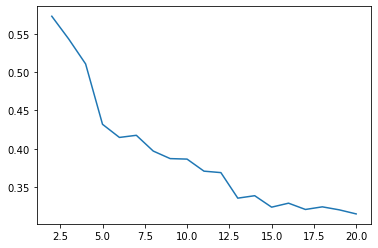

Début de Davies
20 : 0.895761796181975
--- 0.17842531204223633 seconds ---


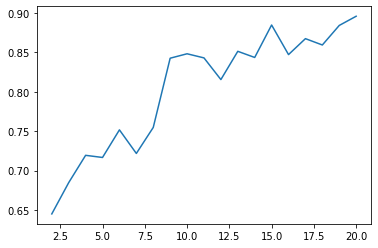

Début de Calinski
9 : 1260.5600958029913
--- 0.14440655708312988 seconds ---


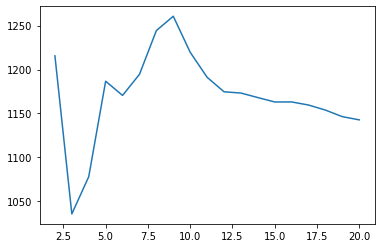

20

In [158]:
trouverKAgglo(data)

Début de Silhouette
20 : 0.36602660907903495
--- 0.07251572608947754 seconds ---


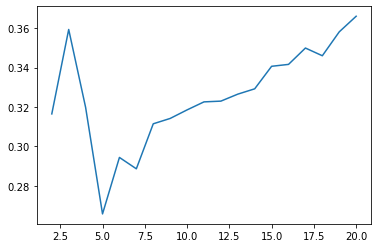

Début de Davies
2 : 1.206715319831201
--- 0.07683515548706055 seconds ---


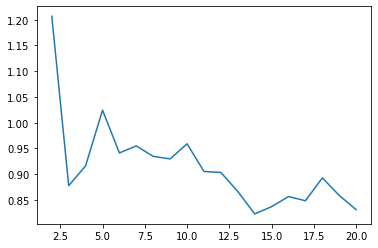

Début de Calinski
19 : 261.0115042460546
--- 0.0461885929107666 seconds ---


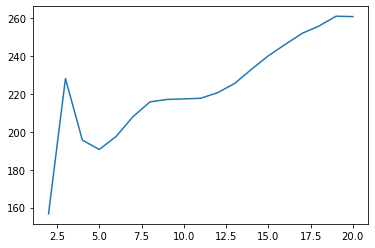

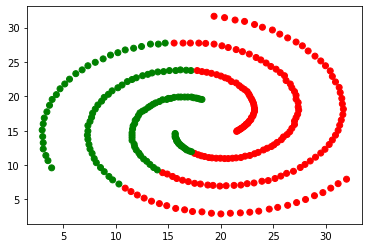

In [159]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverKAgglo(data)
clustering = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)


# DBSCAN

In [160]:
from sklearn.cluster import DBSCAN

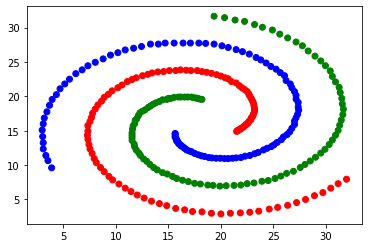

In [164]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
clustering = DBSCAN(eps=3, min_samples=2).fit(convertirData(data))
visualisation(data, clustering.labels_)



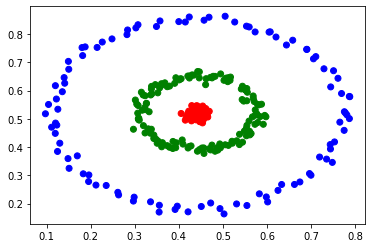

0.0869743824005127


In [180]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/zelnik1.arff','r'))

start_time = time.time()
clustering = DBSCAN(eps=0.06, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)
print(time.time() - start_time)


# Limite

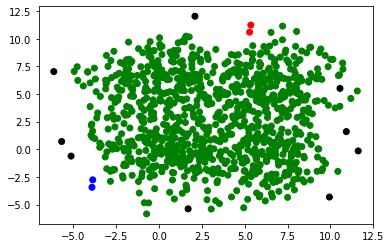

In [184]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/square5.arff','r'))
clustering = DBSCAN(eps=1, min_samples=2).fit(convertirData(data))
visualisation(data, clustering.labels_)


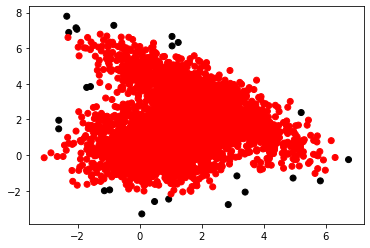

In [187]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/engytime.arff','r'))
clustering = DBSCAN(eps=0.5, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)


# HDBSCAN

In [190]:
!pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp38-cp38-linux_x86_64.whl size=3858133 sha256=5ee356581cc00373a86f6074bc7b36d57714cfa4f0c42fd2dab1ff84ffed8f0b
  Stored in directory: /home/picco/.cache/pip/wheels/26/f2/c2/eab587fff76dc9ffc9a9bf3ca0e44e26d2ef6425264492df65
Successfully built hdbscan


In [ ]:
import hdbscan
from sklearn.datasets import make_blobs